In [ ]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
import seaborn as seabornInstance

1.1.1 Пример
Задача:
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [ ]:
# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


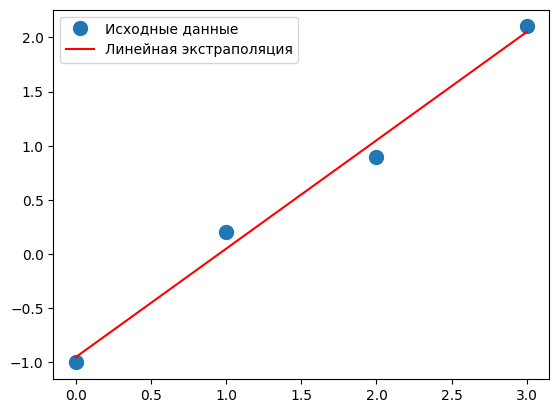

In [ ]:
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

## 1.1.2 Пример
### Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.
### Решение:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
x.tofile('/content/drive/MyDrive/tmp/x_data.txt', '\n')
y.tofile('/content/drive/MyDrive/tmp/y_data.txt', '\n')

In [ ]:
# Читаем данные из файлов
x = np.fromfile('/content/drive/MyDrive/tmp/x_data.txt', float, sep='\n')
y = np.fromfile('/content/drive/MyDrive/tmp/y_data.txt', float, sep='\n')

print(x)
print(y)

[-5.21122635 -4.27855708 -3.46694041 -1.68030075 -0.54364082  0.18490281
  0.87757719  1.85683623  2.66499255  4.33861553  4.58727592]
[25.42939321 16.12425882  8.89732394  3.72963554  0.57845719  0.11773294
  0.62742399  3.82180652  8.67725303 16.10528519 24.86923181]


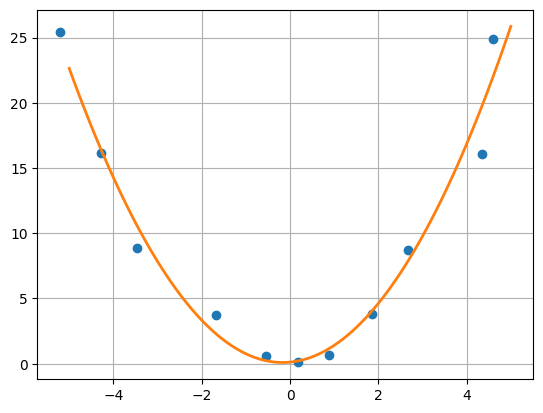

In [ ]:
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаём вектор m = [x**2, x, E]
m = np.vstack((x**2, x, np.ones(11))).T
# находим коэффициенты при состовляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'o')
# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('/content/drive/MyDrive/tmp/parabola.png')

## 1.1.3 Пример
### Задача:
По данным предыдущего примера постройте график экполяционного полинома
третьего порядка
### Решение:

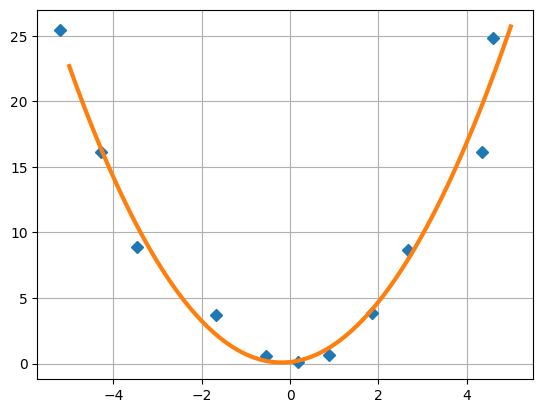

In [ ]:
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# Задаем вектор m = [x**3, x, E]
m = np.vstack((x**3, x**2, x, np.ones(11))).T
# Находим коэффициенты при состовляющих m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('/content/drive/MyDrive/tmp/plot-2.png')

### Задача:
Подставьте собственные данные и постройте экcтраполяцию полиномами
первой, второй и третьей степени.
### Решение:

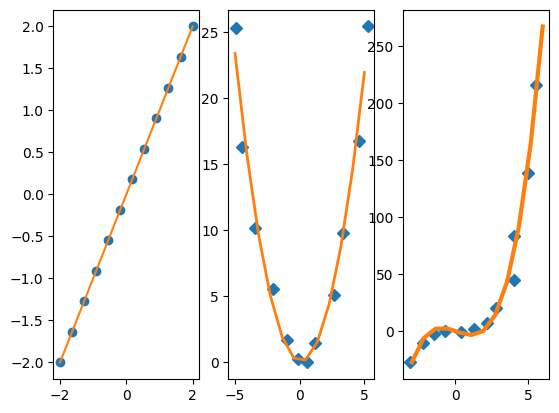

In [ ]:
x1 = np.linspace(-2, 2, 12)
y1 = np.linspace(-2, 2, 12)

x2 = np.linspace(-5, 5, 12)
y2 = x2**2 + rand(12) - 0.5
x2 += rand(12) - 0.5

x3 = np.linspace(-3, 6, 12)
y3 = x3**3 + rand(12) - 0.5
x3 += rand(12) - 0.5


m1 = np.vstack((x1, np.ones(12))).T
m2 = np.vstack((x2**2, x2, np.ones(12))).T
m3 = np.vstack((x3**3, x3**2, x3, np.ones(12))).T

s1 = np.linalg.lstsq(m1, y1, rcond=None)[0]
s2 = np.linalg.lstsq(m2, y2, rcond=None)[0]
s3 = np.linalg.lstsq(m3, y3, rcond=None)[0]

x1_prec = np.linspace(-2, 2, 6)
x2_prec = np.linspace(-5, 5, 12)
x3_prec = np.linspace(-3, 6, 12)


plt.subplot(1, 3, 1)
plt.plot(x1, y1, 'o')
plt.plot(x1_prec, s1[0] * x1_prec + s1[1])

plt.subplot(1, 3, 2)
plt.plot(x2, y2, 'D')
plt.plot(x2_prec, s2[0] * x2_prec**2 + s2[1] * x2_prec + s2[2], '-', lw=2)

plt.subplot(1, 3, 3)
plt.plot(x3, y3, 'D')
plt.plot(x3_prec, s3[0] * x3_prec**3 + s3[1] * x3_prec**2 + s3[2] * x3_prec + s3[3], '-', lw=3)

## 1.1.4 Пример
### Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)
### Решение:

In [ ]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

In [ ]:
# используем функцию для получения решения в виде поэффициентов фукнции f(x) дл указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.2577561 , 0.73734789, 0.52453237])

In [ ]:
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.00025138874786145637
0.12608082704745646


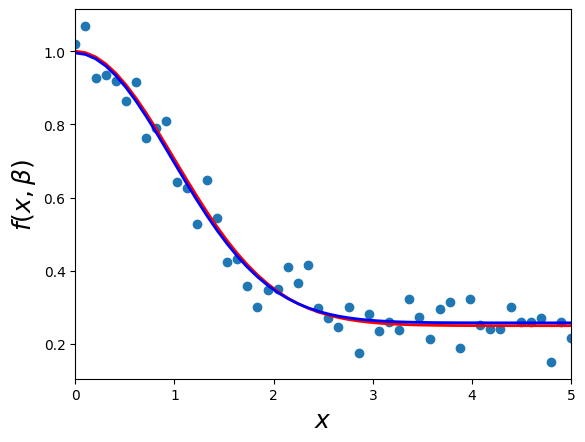

In [ ]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [ ]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.01846162 1.06899014 0.9260692  0.93380626 0.91948576 0.86396905
 0.91664908 0.7618421  0.78970543 0.80934815 0.6420958  0.62642824
 0.5285134  0.64859812 0.54384805 0.42369199 0.43244827 0.35841725
 0.30068454 0.34633234 0.35049887 0.41160725 0.36733604 0.41489159
 0.29780246 0.27105362 0.24654946 0.30127884 0.17431121 0.28191879
 0.23421164 0.26006083 0.23717083 0.32367771 0.27374607 0.21333946
 0.29483414 0.31555104 0.18812121 0.32

## 1.1.5 Пример
### Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1
### Решение:

[0.24865052 0.746773  ]
0.0001569348464368772
0.1379944383760102


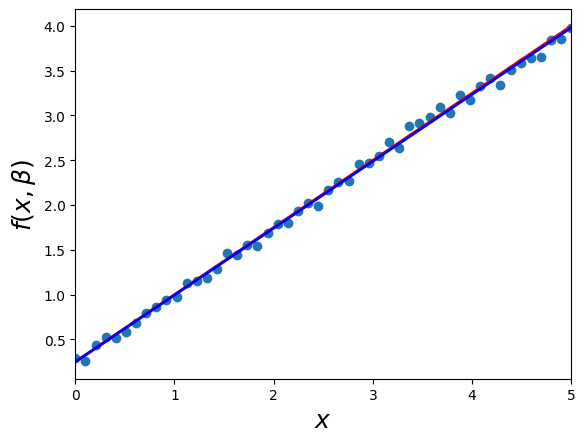

In [ ]:
# 1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.23243807 0.75487135 0.49915776]
0.00010250122033535458
0.08547529166827465


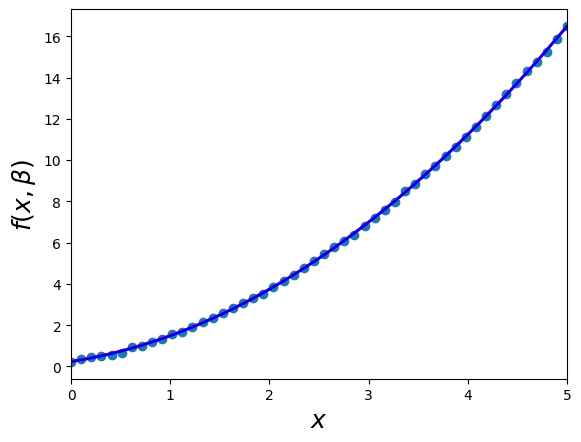

In [ ]:
#2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.0027876  1.99560373]
5.869180172823858e-05
0.1357213590269915


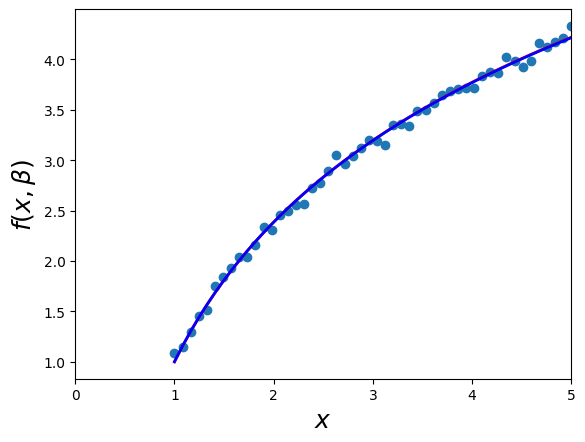

In [ ]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.01148792 1.9996026 ]
0.00010246462101367091
0.11426920298272834


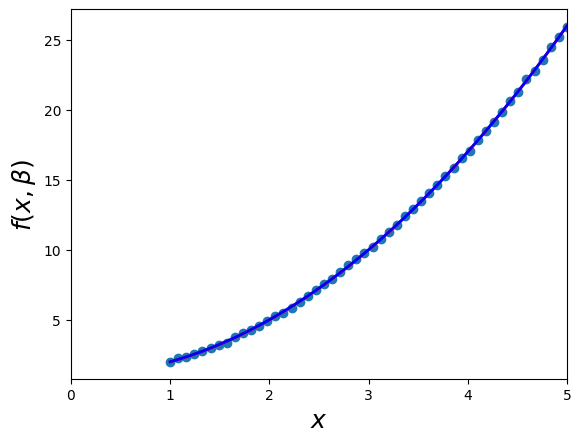

In [ ]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x**b1
# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### Задача:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.
### Решение:

[0.25129367 0.74989223 0.50005857]
2.0423991193458234e-05
0.02003360556929204


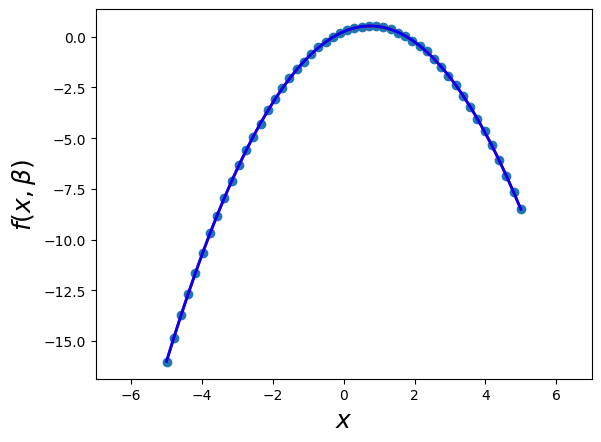

In [ ]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x - b2 * x**2
# Зададим массив точек xi
xdata = np.linspace(-5, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.02 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-7, 7)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 1.2 Теоретический материал – Задачи регрессии

<b>Линейная регрессия</b> - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

## 1.2.1 Пример
### Задача:
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn
### Решение:

In [ ]:
# Создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время' : [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00,
                              4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка' : [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [ ]:
# исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


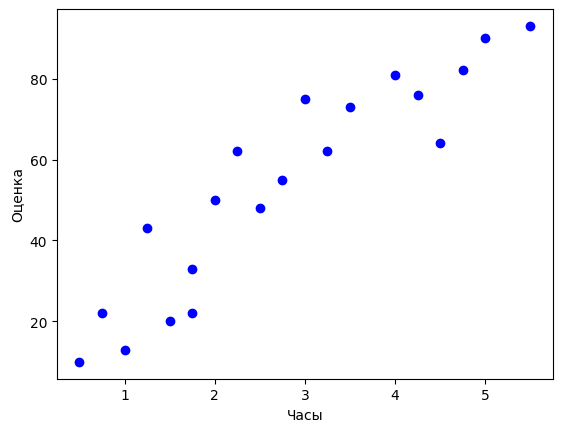

In [ ]:
# нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label="Данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [ ]:
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [ ]:
y_pred = regressor.predict(x_test)
# Сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


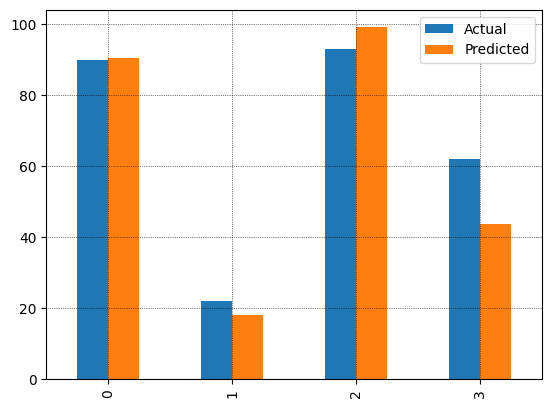

In [ ]:
# Визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.show()

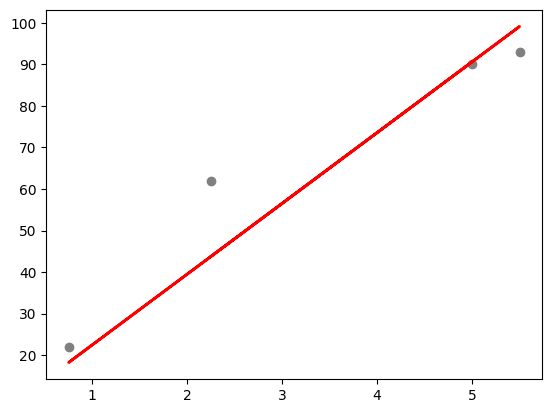

In [ ]:
# Построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

### Задача:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов.
Найдите коэффициенты линии регрессии. Постройте прогноз.
### Решение:

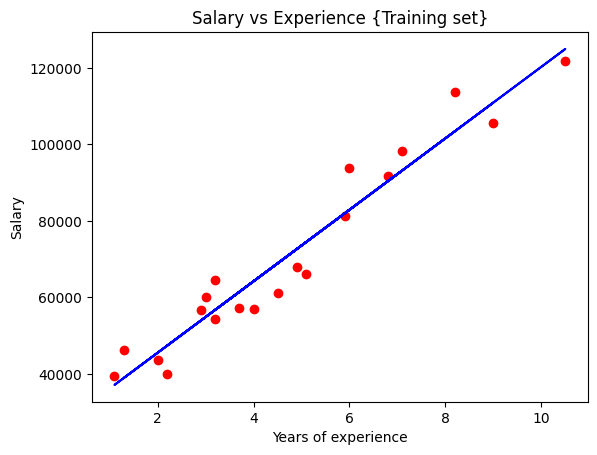

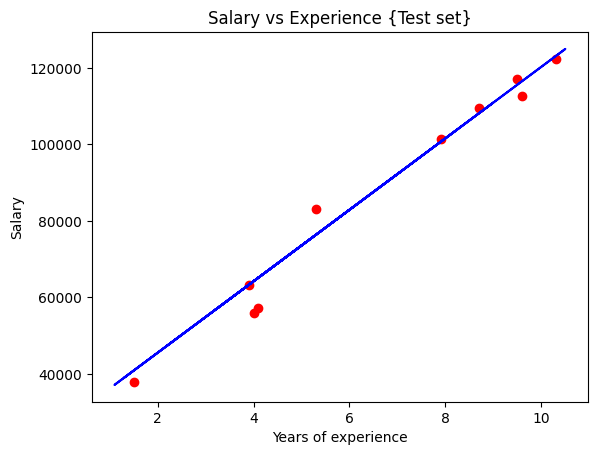

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience {Training set}')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()


plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience {Test set}')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

# 1.3 Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

## 1.3.1 Пример
### Задание:
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.
### Решение:

In [ ]:
y =  [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

x = np.transpose(x)
x = np.c_[x, np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## 1.3.2 Пример
### Задача:
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.
### Решение:

In [ ]:
y =  [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

# Формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)

new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)


df1 = df1.rename(columns = {0: 'y'}, inplace=False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [ ]:
# изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [ ]:
# Разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [ ]:
# Разделим данные на обучающую и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [ ]:
# Для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [ ]:
# Чтобы сделать пронозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [ ]:
# Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  1.3272699242343076


### Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
### Решение:

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')

print(data.shape[0], 'records')
data.head()


30 records


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = data.iloc[:, :-1]
y = data.iloc[:, 1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
YearsExperience,9312.575127


In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [ ]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  12823412.298126549


### Задача:
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.
### Решение:

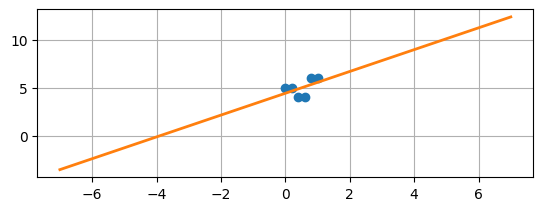

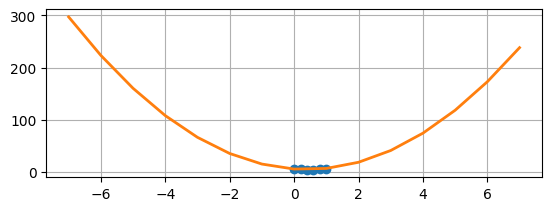

In [ ]:
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])

# Я взял 2 вариант

m1 = np.vstack((x, np.ones(6))).T
s1 = np.linalg.lstsq(m1, y, rcond=None)[0]


m2 = np.vstack((x**2, x, np.ones(6))).T
s2 = np.linalg.lstsq(m2, y, rcond=None)[0]


plt.subplot(2, 1, 1)
x1_prec = np.linspace(-7, 7, 15)
plt.plot(x, y, 'o')
plt.plot(x1_prec, s1[0] * x1_prec + s1[1], '-', lw=2)
plt.grid()
plt.show()

x2_prec = np.linspace(-7, 7, 15)
plt.subplot(2, 1, 2)
plt.plot(x, y, 'o')
plt.plot(x2_prec, s2[0] * x2_prec**2 + s2[1] * x2_prec + s2[2], '-', lw=2)
plt.grid()
plt.show()